In [1]:
source("C:/Users/Tom Work/PycharmProjects/twipsy-lite/ts.R")


Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Loading required package: timeDate
This is forecast 7.1 



Clean up data and fill in NaNs, and unify the length of the time series to 28 days. We look at September 2-29 and June 3-30. The June data doesn't have any missing data in the time span we are looking at.

In [2]:
sept_cas = ts(preprocessing('E:/summary/sept_casual.csv', 'E:/summary/sept_total.csv')$series[25:696], frequency=24)
sept_tot = ts(preprocessing('E:/summary/sept_casual.csv', 'E:/summary/sept_total.csv')$total[25:696], frequency=24)

 [1] 408 409 410 411 412 413 414 415 476 477 478 479 485 486 721 722 723 724 725
 [1] 408 409 410 411 412 413 414 415 476 477 478 479 485 486 721 722 723 724 725


In [3]:
june_cas = ts(preprocessing('E:/summary/june_casual.csv', 'E:/summary/june_total.csv')$series[49:720], frequency=24)
june_tot = ts(preprocessing('E:/summary/june_casual.csv', 'E:/summary/june_total.csv')$total[49:720], frequency=24)

 [1]   2   3   4   5   6   7  26  27  28  29  30  31 721 722 723
 [1]   2   3   4   5   6   7  26  27  28  29  30  31 721 722 723


In [4]:
july_cas = ts(preprocessing('E:/summary/july/july_casual.csv', 'E:/summary/july/july_total.csv')$series[49:720], frequency=24)
july_tot = ts(preprocessing('E:/summary/july/july_casual.csv', 'E:/summary/july/july_total.csv')$total[49:720], frequency=24)

  [1] 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223
 [19] 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241
 [37] 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259
 [55] 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277
 [73] 278 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293 294 295
 [91] 296 297 298 299 300 301 302 303 304 305 306 307 308 309 310 311 312 313
[109] 314 315 316 317 318 319 320 321 322 323 324 325 326 327 328 329 330 331
[127] 332 333 334 335 336 337 338 339 340 341 342 343 344 345 346 347 348 349
[145] 350 351 352 353 354 355 356 357 358 359 360 361 362 363 364 365 366 367
[163] 368 369 370 371 372 373 374 375 376 377 378 379 380 381 382 383 384 385
[181] 386 387 388 389 390 391 392 393 394 395 396 397 398 399 400 401 402 403
[199] 404 405 406 407 408 409 410 411 412 413 414 415 416 417 418 419 420 421
[217] 422 423 424 425 426 427 428 429 430 431 432 433 434 435 43

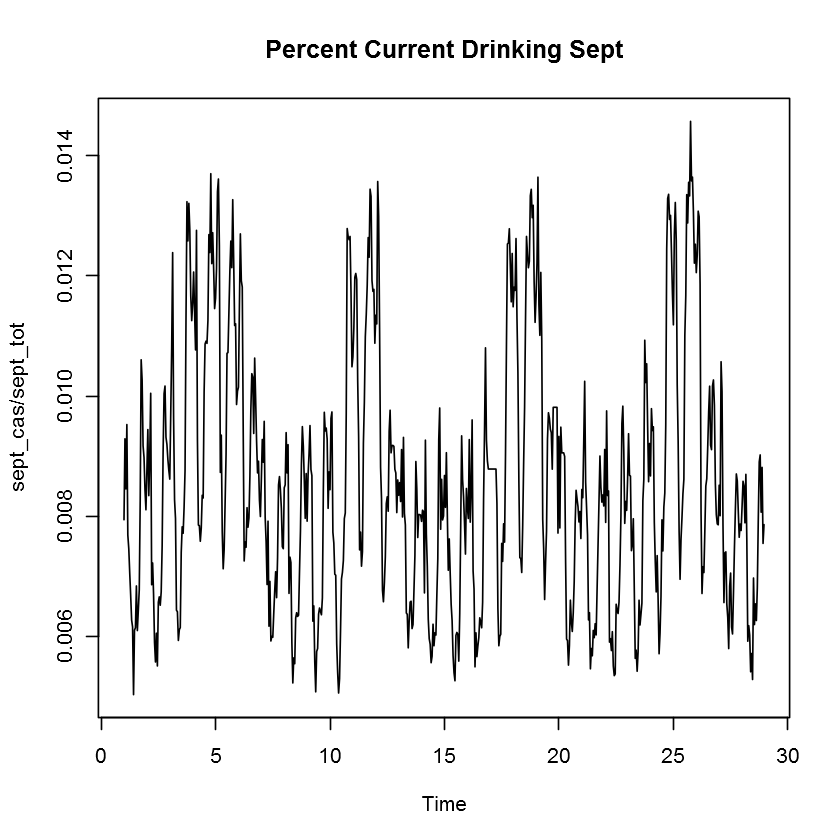

In [5]:
plot(sept_cas/sept_tot, main='Percent Current Drinking Sept')

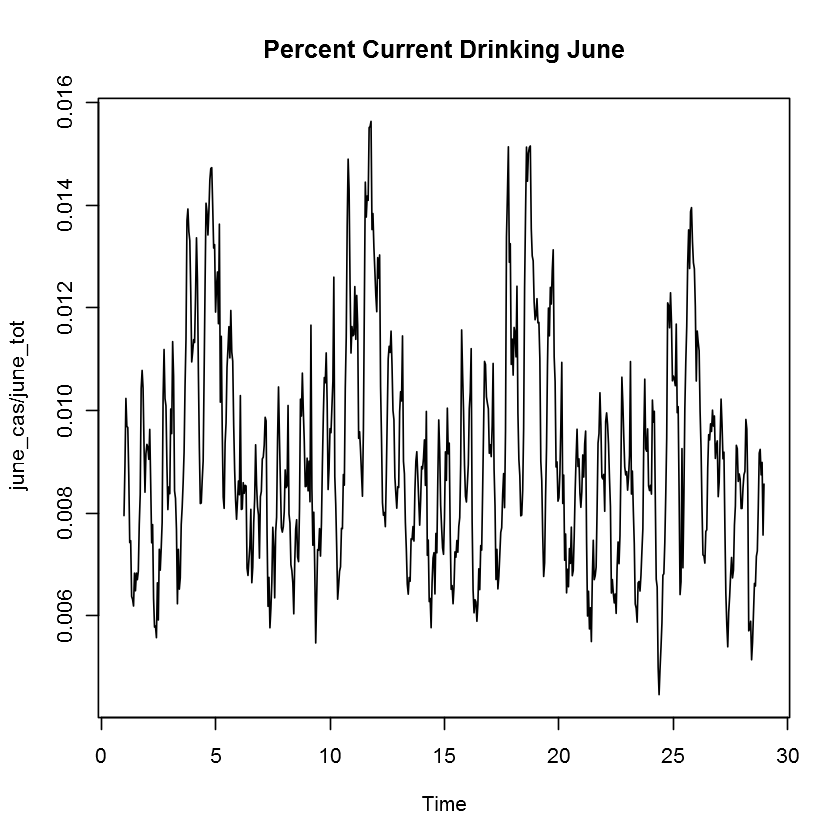

In [6]:
plot(june_cas/june_tot, main='Percent Current Drinking June')

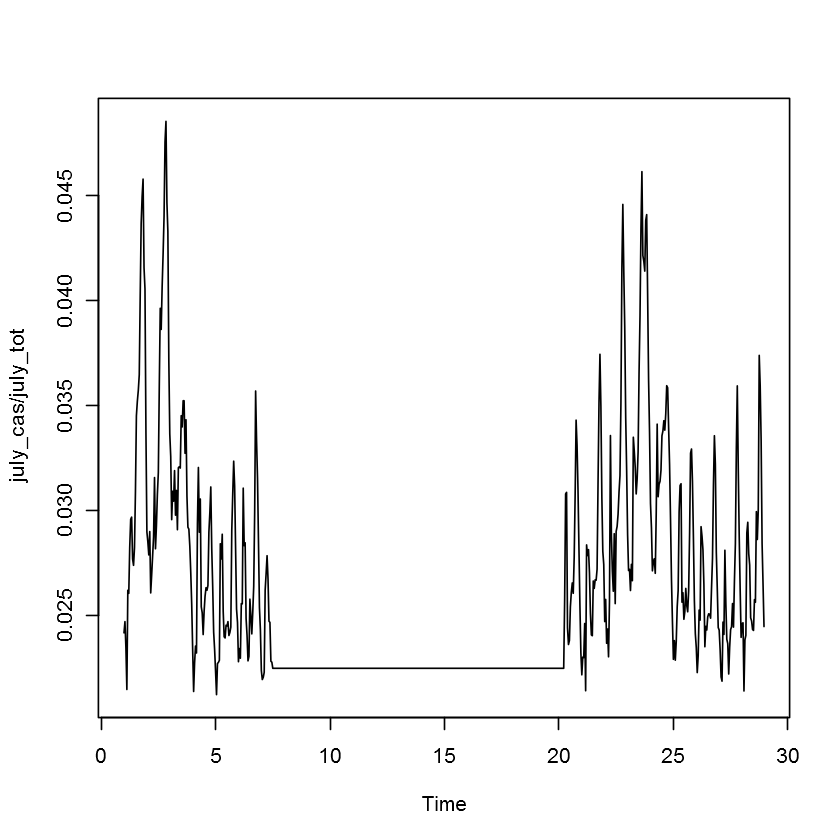

In [163]:
plot(july_cas/july_tot)

# ARIMA

Difference by week/day, the fit ARIMA(2,0,2)x(2,0,2)

In [8]:
sept_perc = diff(log(sept_cas/sept_tot), 168)
june_perc = diff(log(june_cas/june_tot), 168)

Plot the differenced data. There are still visible cycles which indicate that there are significant differences between the weeks, especially in September. This might suggest that ARIMA won't fit perfectly.

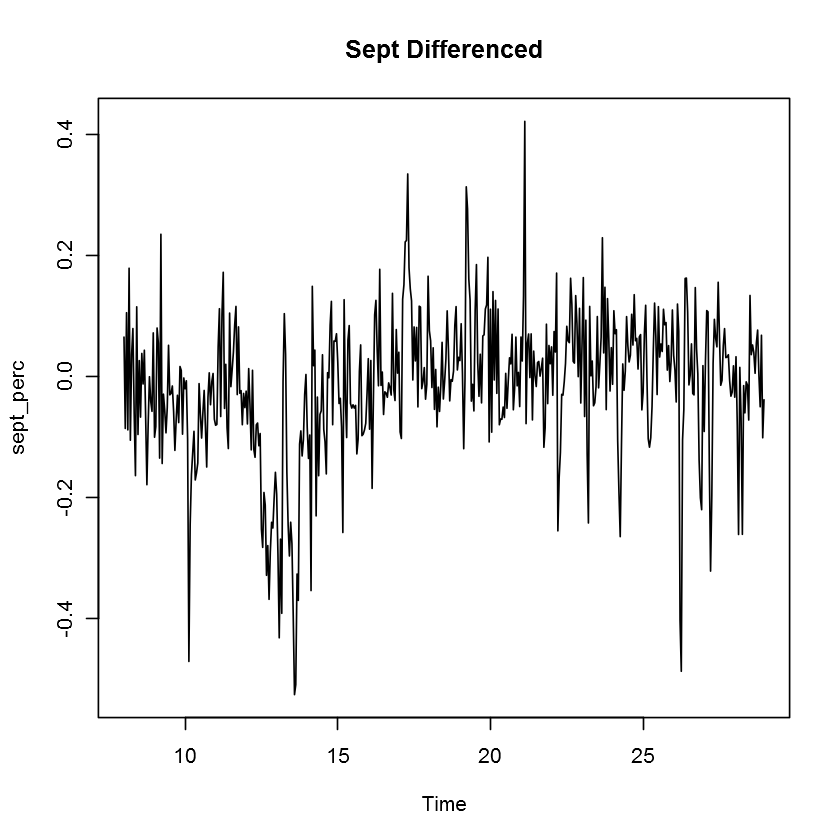

In [9]:
plot(sept_perc, type='l', main='Sept Differenced')

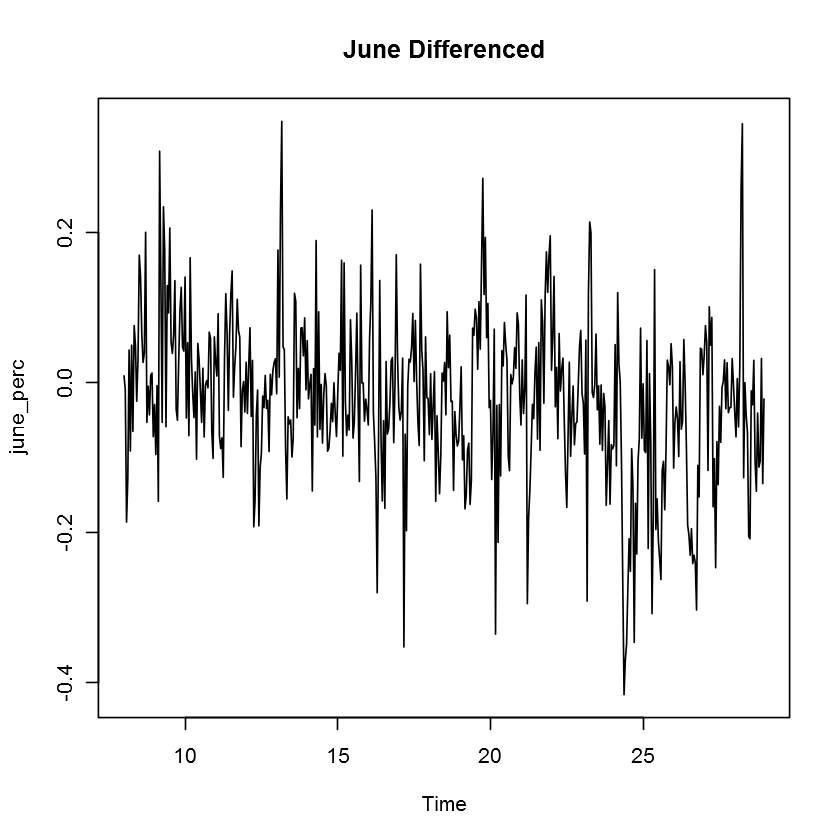

In [10]:
plot(june_perc, type='l', main='June Differenced')

In [11]:
library(astsa)


Attaching package: 'astsa'

The following object is masked from 'package:forecast':

    gas



In [12]:
sept_arima = arima(sept_perc, order=c(2, 0, 2), seasonal=list(order=c(2, 0, 2), period=24))

In [13]:
june_arima = arima(june_perc, order=c(2, 0, 2), seasonal=list(order=c(2, 0, 2), period=24))

When comparing the arima coefficients, the seasonal (daily) are similar but the hourly are not.

In [14]:
sept_arima


Call:
arima(x = sept_perc, order = c(2, 0, 2), seasonal = list(order = c(2, 0, 2), 
    period = 24))

Coefficients:
         ar1      ar2      ma1     ma2    sar1     sar2     sma1    sma2
      1.5110  -0.5274  -1.1554  0.2442  1.2764  -0.7449  -1.3558  0.9995
s.e.  0.1576   0.1488   0.1656  0.1263  0.0866   0.0515   0.1302  0.1717
      intercept
        -0.0167
s.e.     0.0287

sigma^2 estimated as 0.008353:  log likelihood = 463.59,  aic = -907.18

In [15]:
june_arima


Call:
arima(x = june_perc, order = c(2, 0, 2), seasonal = list(order = c(2, 0, 2), 
    period = 24))

Coefficients:
          ar1     ar2     ma1      ma2    sar1    sar2    sma1     sma2
      -0.0485  0.6540  0.3519  -0.3470  0.0822  0.3659  0.0518  -0.4215
s.e.   0.2538  0.2164  0.2687   0.1687  0.3226  0.1816  0.3199   0.2061
      intercept
        -0.0224
s.e.     0.0120

sigma^2 estimated as 0.008886:  log likelihood = 474.51,  aic = -929.01

In [16]:
residual_analysis <- function(res){
    tsdisplay(res, lag.max=200)
    qqnorm(res)
    plot(density(res))
    
}

Residual analysis: September residuals are more normal but fail the Ljung-box test up to lag 48 (2x length of the season component is considered a good rule of thumb from what I've seen), which basically tests the significance of all autocorrelations of the residuals up to lag 48. The June fit passes this test. Residuals from both months still display some negative autocorrelation at 168 hours which indicates that the weekly component is not described well by differencing.

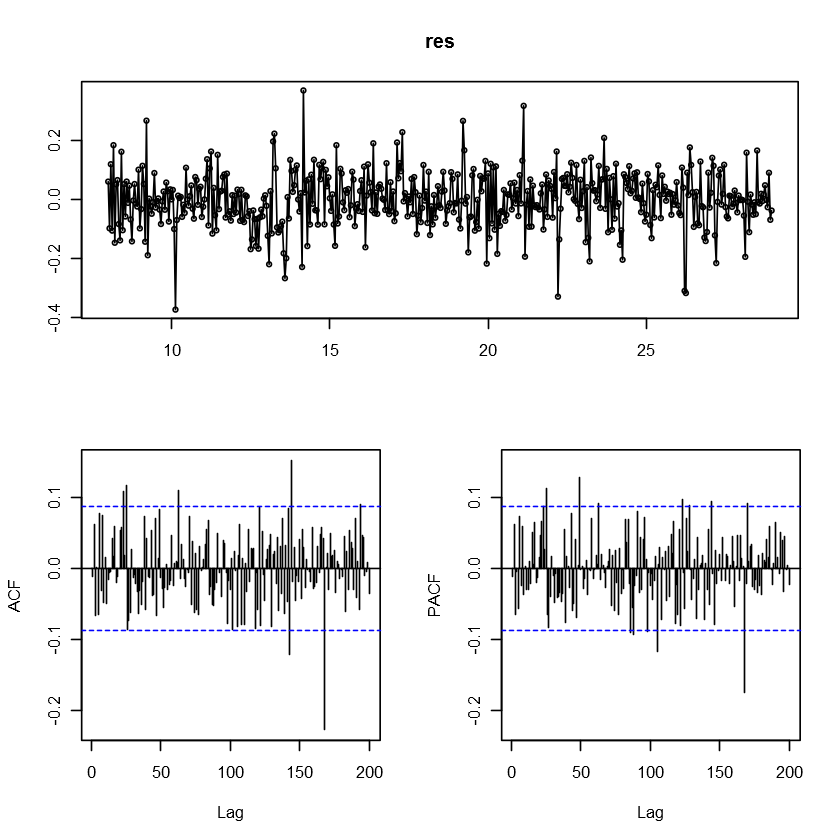

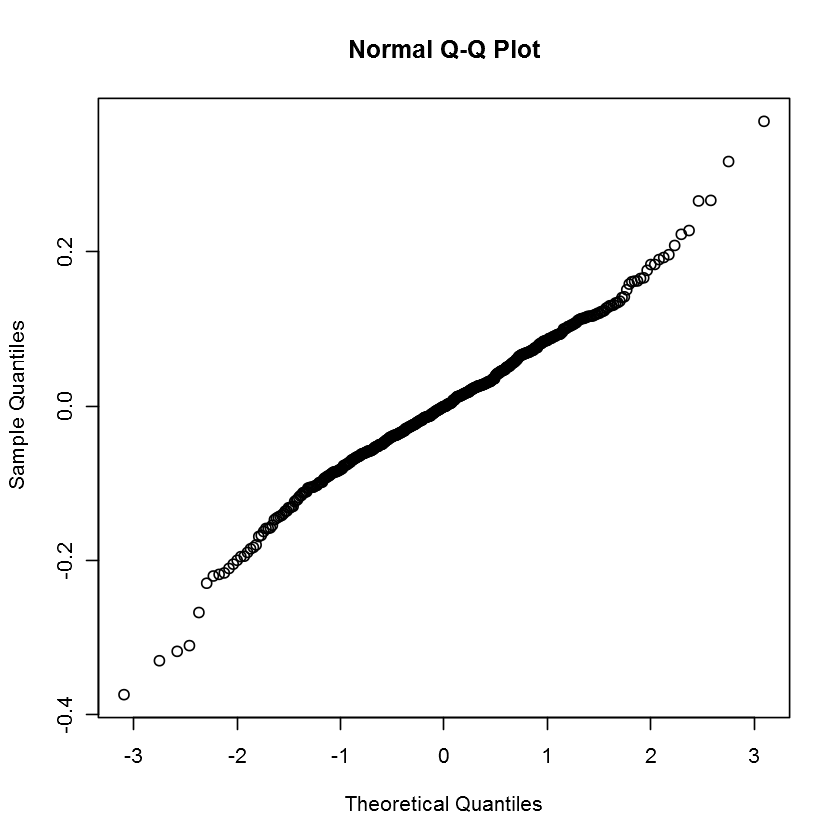

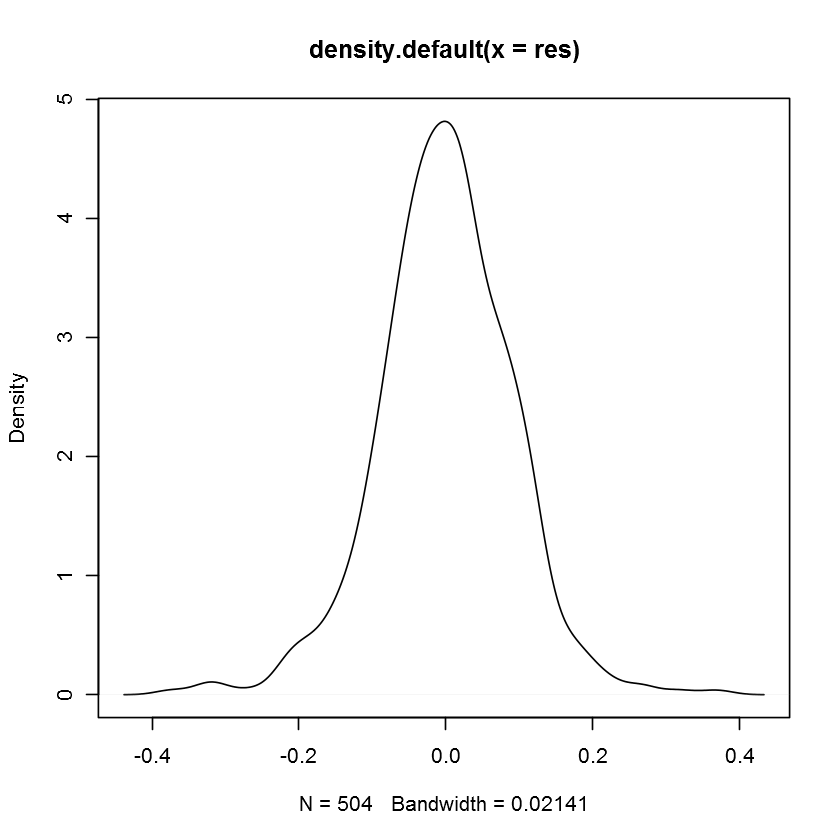

In [17]:
residual_analysis(sept_arima$residuals)

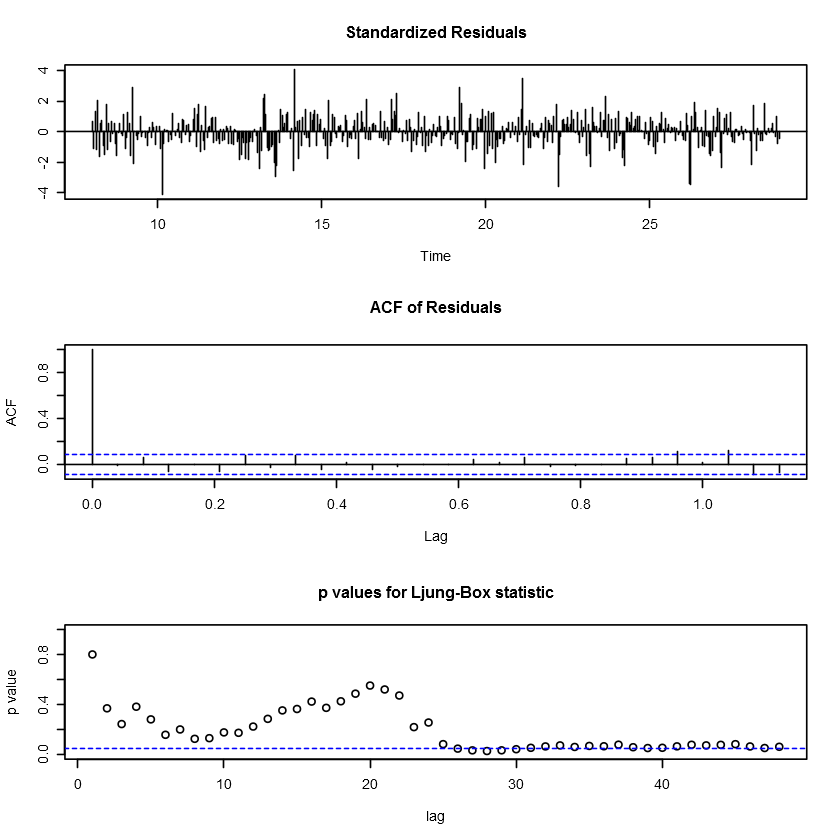

In [18]:
tsdiag(sept_arima, gof.lag=48)

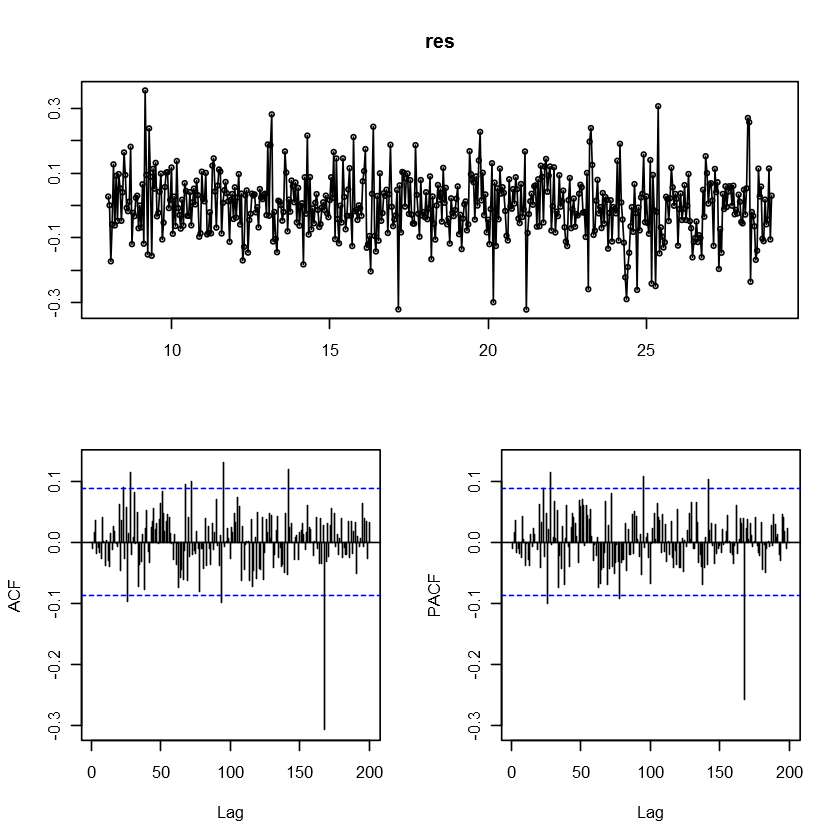

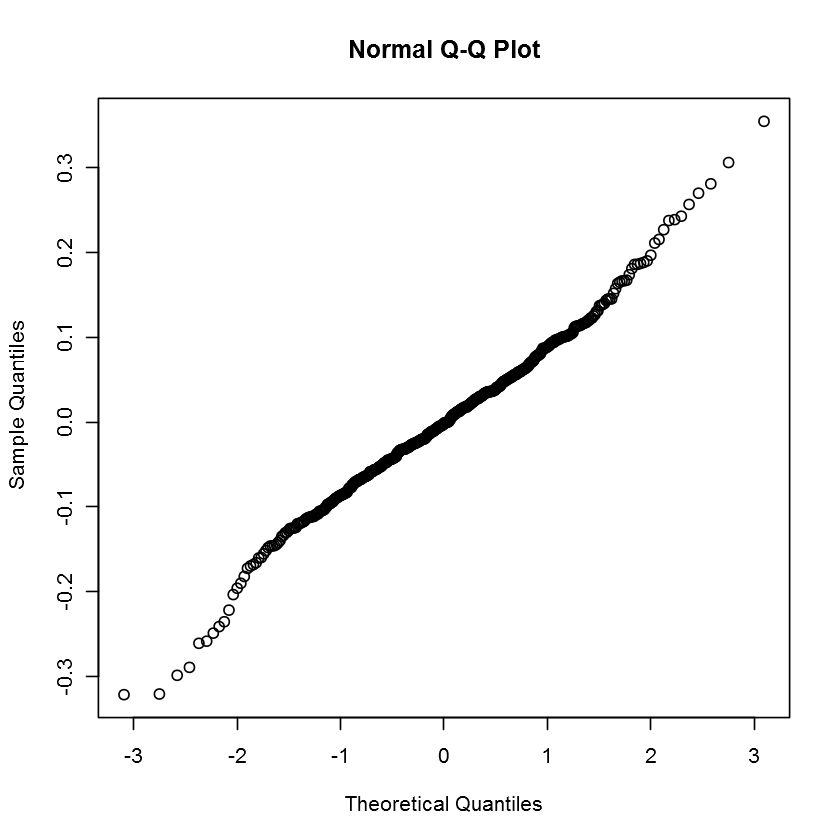

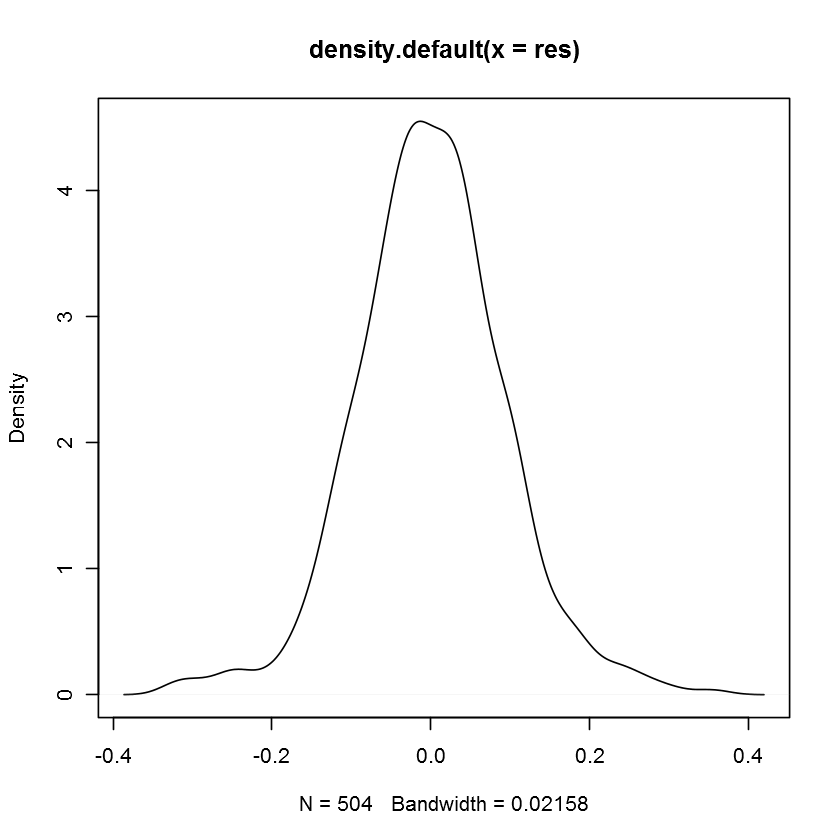

In [19]:
residual_analysis(june_arima$residuals)

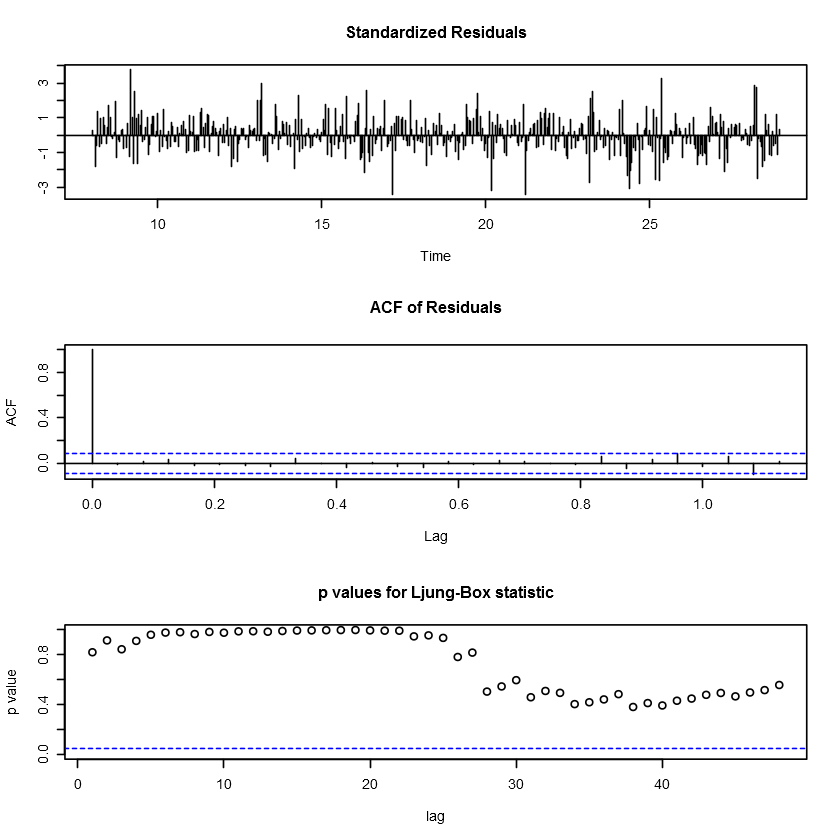

In [20]:
tsdiag(june_arima, gof.lag=48)

# Fourier

DFT of both months. The June DFT is significantly cleaner which is probably due to the the missing datapoints in Sept.

In [98]:
sept_freq = ts(abs(fft(sept_cas/sept_tot)^2)[2:300])

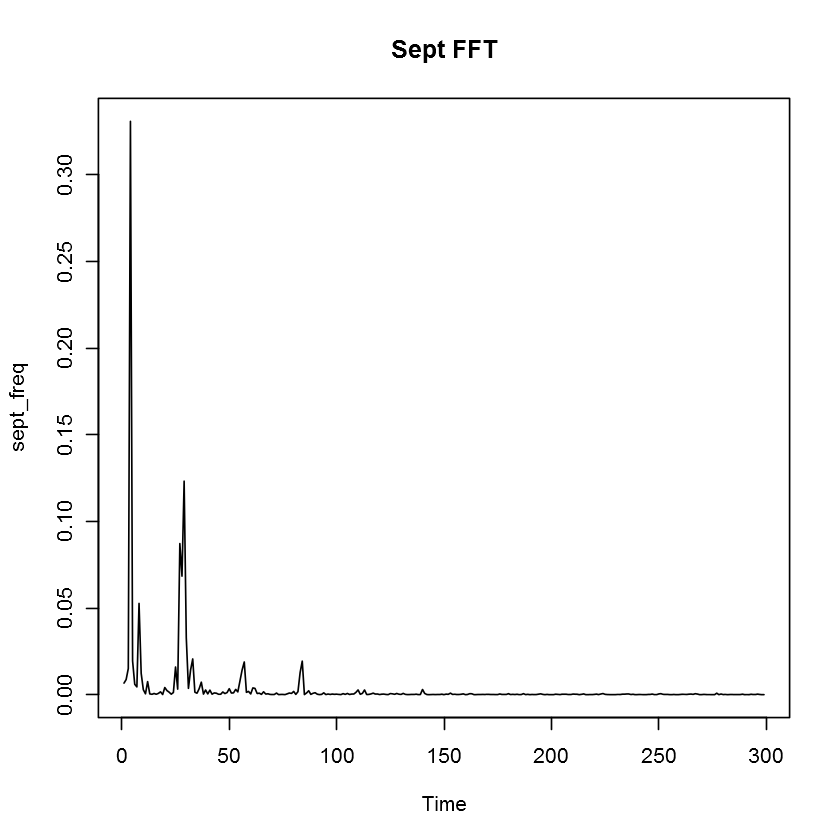

In [127]:
plot(sept_freq, main='Sept DFT')

In [100]:
june_freq = ts(abs(fft(june_cas/june_tot)^2)[2:300])

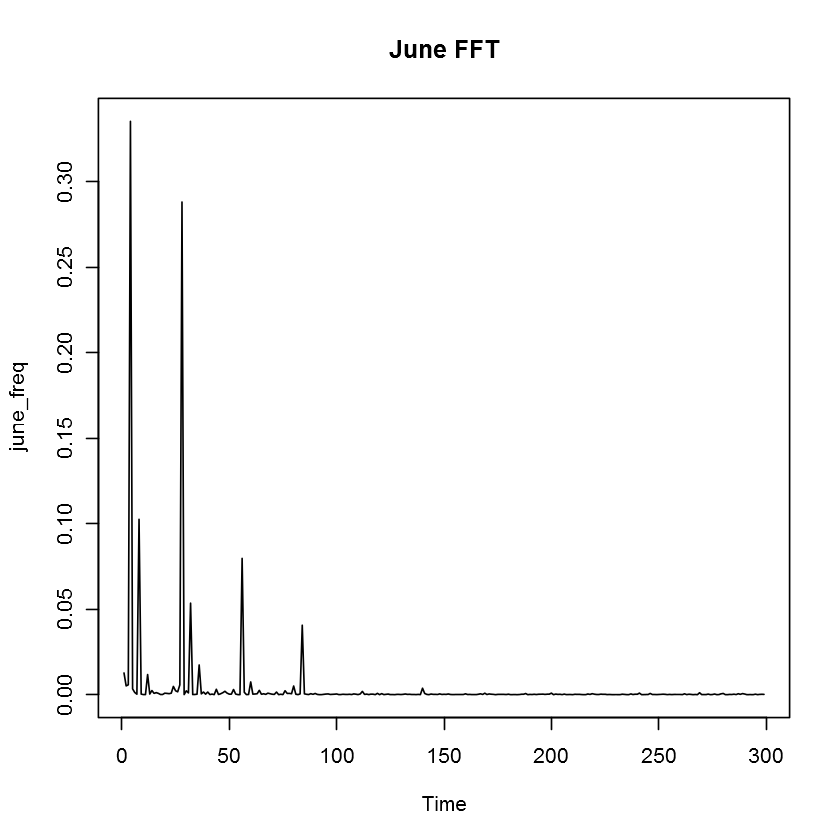

In [128]:
plot(june_freq, main='June DFT')

# DWT

We look at at the levels of DWT that are the most interpretable. Usually it only makes sense to compare the amplitudes between levels within a single wavelet transform which basically indicates how much of the series is explained by each frequency band. However the Sept and June time series had similar enough amplitudes (~0.01 average) so the DWTs were very similar. I decided unified the y-axis between the levels for each month. The x axis is 28*7 hours sampled every 2^(level)

In [54]:
library('wavelets')


Attaching package: 'wavelets'

The following object is masked from 'package:timeDate':

    align



In [102]:
length(sept_cas)

[1] 672

In [103]:
june_dwt = dwt((june_cas/june_tot), filter='d8')

In [104]:
sept_dwt = dwt((sept_cas/sept_tot), filter='d8')

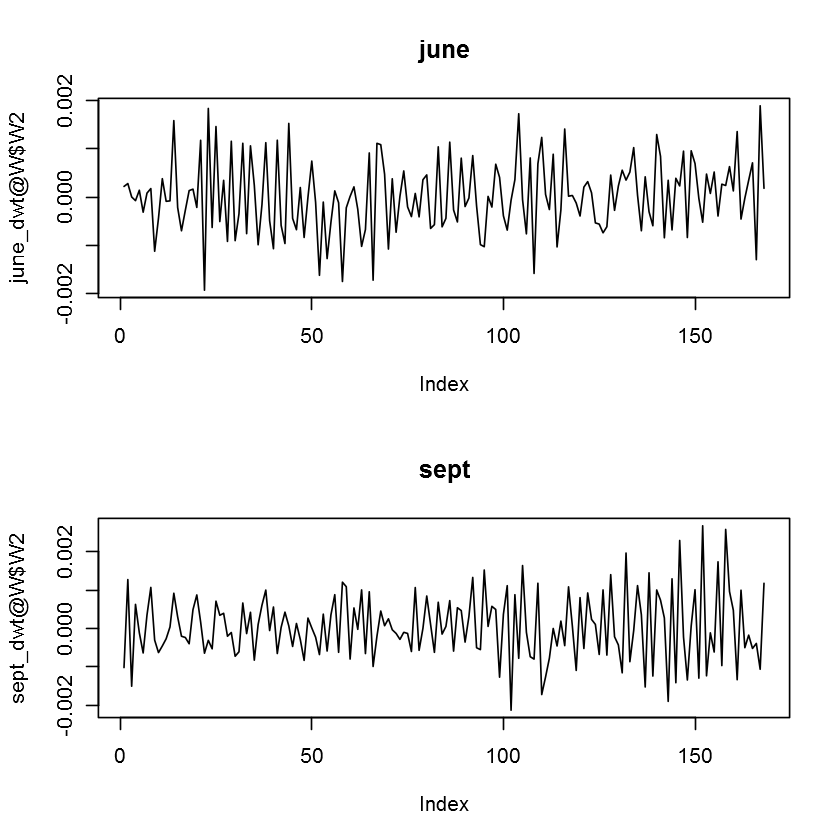

In [114]:
par(mfrow=2:1)
plot(june_dwt@W$W2, type='l', main='june')
plot(sept_dwt@W$W2, type='l', main='sept')

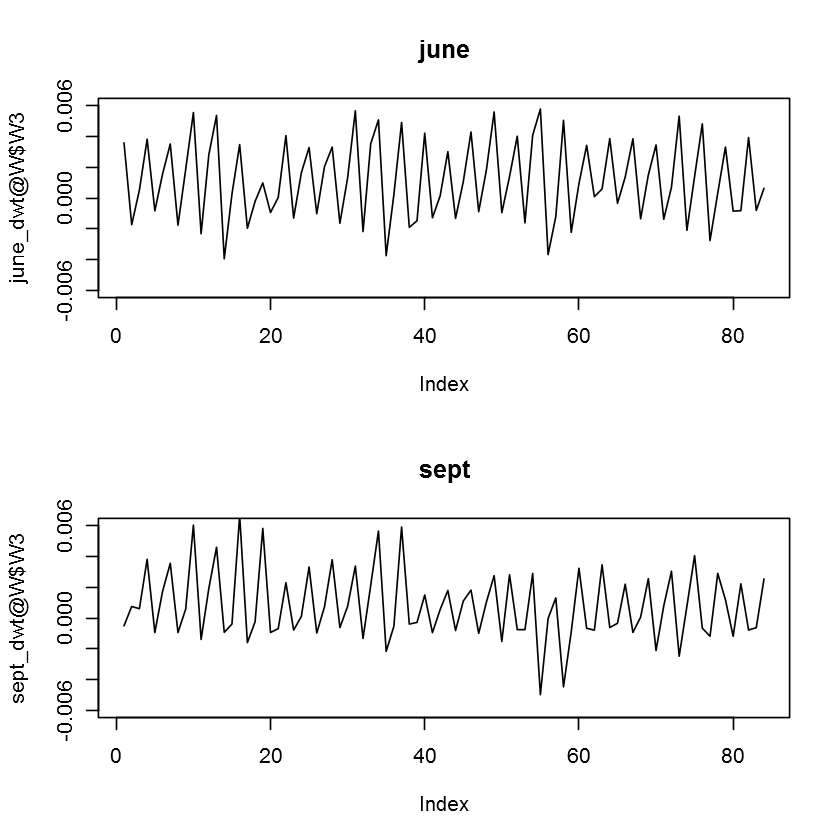

In [118]:
par(mfrow=2:1)
plot(june_dwt@W$W3, type='l', main='june',ylim = c(-0.006, 0.006))
plot(sept_dwt@W$W3, type='l', main='sept',ylim = c(-0.006, 0.006))

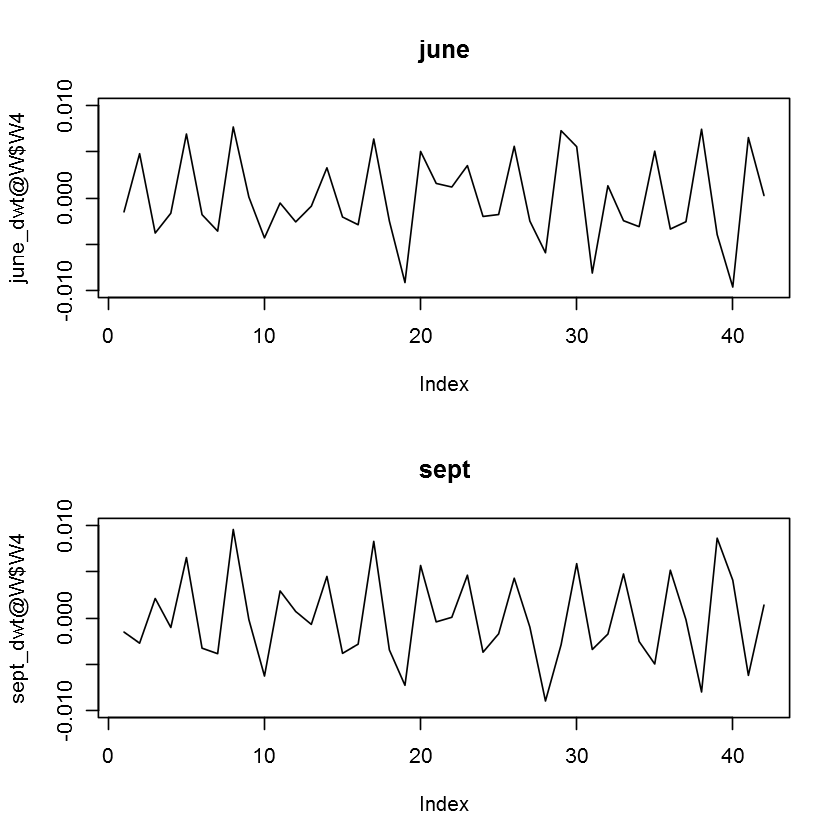

In [126]:
par(mfrow=2:1)
plot(june_dwt@W$W4, type='l', ylim=c(-0.01, 0.01), main='june')
plot(sept_dwt@W$W4, type='l', ylim=c(-0.01, 0.01), main='sept')

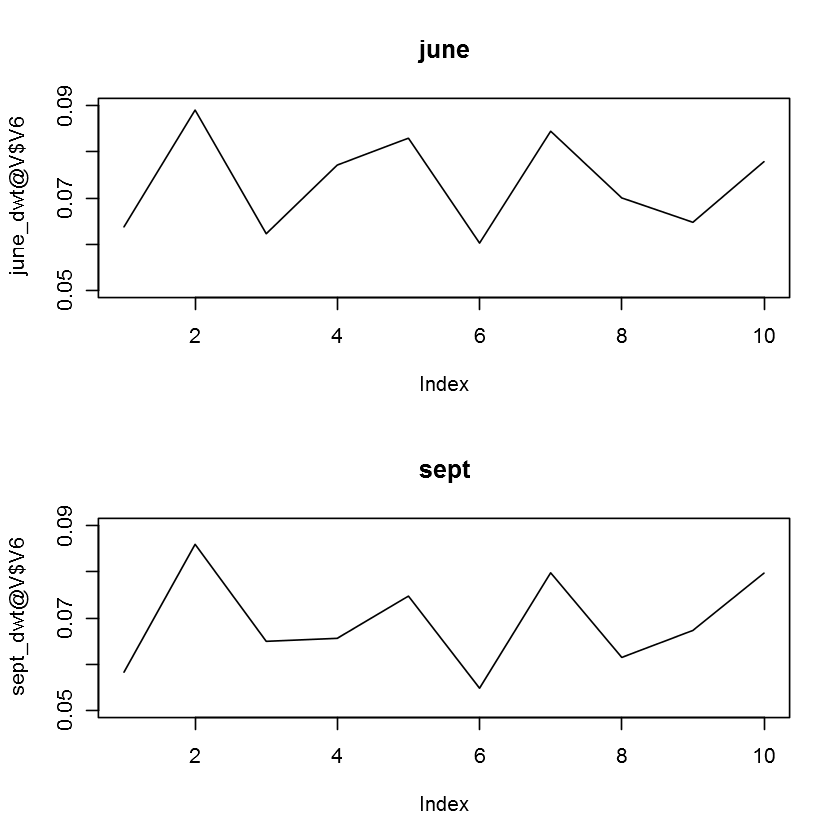

In [125]:
par(mfrow=2:1)
plot(june_dwt@V$V6, type='l',ylim = c(0.05, 0.09), main='june')
plot(sept_dwt@V$V6, type='l',ylim = c(0.05, 0.09), main='sept')